In [26]:
%pip install pandas

     ---------------------------------------- 10.6/10.6 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *

In [28]:
knesset_members_df = pd.read_csv('kns_csv_files\kns_person.csv')
first_names, last_names = knesset_members_df['FirstName'].to_list(), knesset_members_df['LastName'].to_list()
knesset_members = [' '.join([first_name, last_name]) for first_name, last_name in zip(first_names, last_names)]

In [45]:
path = "results/"
knss = [24, 25]
categorys = [2, 4]
agg_scores = []
warned = []
kns_cat = []
knastot = {}
catagor = {}

for kns in knss:
    for cat in categorys:
        with open(f'{path}finetune_{kns}_{cat}.pkl', 'rb') as f:
            tmp_dct = pickle.load(f)
        warnings = tmp_dct['warnings']
        for member, w1w2w3 in warnings[0].items():
            if sum(w1w2w3) != 0 and member in knesset_members:
                warned.append((member, w1w2w3, kns, CATEGORY_ID_TO_NAME[cat]))
        agg_score = tmp_dct['agg_score']
        agg_scores.append(agg_score)
        kns_cat.append(f'{kns}_{CATEGORY_ID_TO_NAME[cat]}')
        tmp_val = knastot.get(kns, [])
        tmp_val.append(agg_score)
        knastot[kns] = tmp_val
        catagor[CATEGORY_ID_TO_NAME[cat]] = tmp_val

avg_knasot = {}
for kns, agg_lst in knastot.items():
    avg_knasot[str(kns)] = np.average(agg_lst)
avg_cat = {}
for cat, agg_lst in catagor.items():
    avg_cat[cat] = np.average(agg_lst)

In [46]:
warned

[('מיקי לוי', [1, 0, 0], 24, 'finance')]

In [15]:
ind = 0
knasots = {}
for k_c in kns_cat:
    a = k_c[:2]
    tmp = knasots.get(a, [[], []])
    tmp[0].append(k_c)
    tmp[1].append(agg_scores[ind])
    knasots[a] = tmp
    ind += 1


In [20]:
avg_cat

{'finance': 0.45966810966810967, 'defense': 0.45966810966810967}

In [4]:
knasots

{'24': [['24_finance', '24_defense'],
  [0.391812865497076, 0.48654708520179374]],
 '25': [['25_finance', '25_defense'],
  [0.42727272727272725, 0.49206349206349204]]}

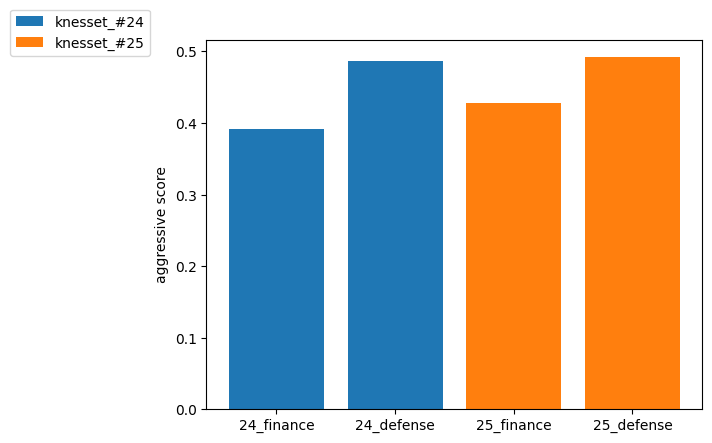

In [16]:
for kns, duo in knasots.items():
    plt.bar(duo[0], duo[1], label= f'knesset_#{kns}')
plt.ylabel("aggressive score")
plt.legend(bbox_to_anchor=(-0.1, 1.1))
plt.show()

Text(0, 0.5, 'aggressive score')

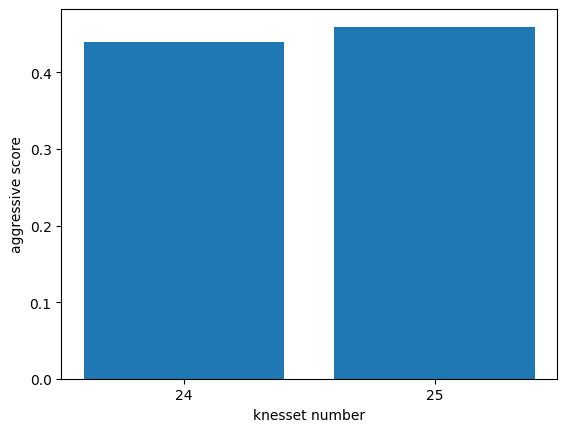

In [18]:
plt.bar(avg_knasot.keys(), avg_knasot.values())
plt.xlabel("knesset number")
plt.ylabel("aggressive score")

Text(0, 0.5, 'aggressive score')

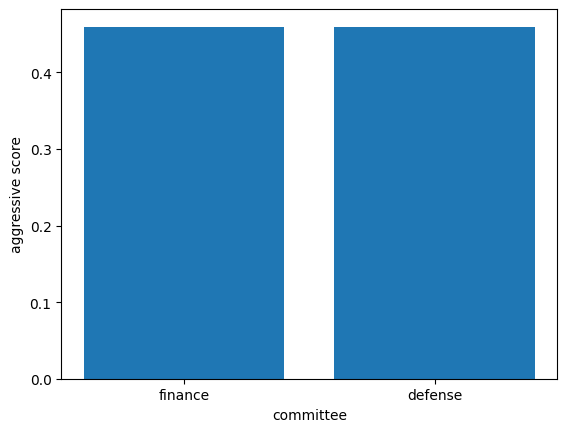

In [19]:
plt.bar(avg_cat.keys(), avg_cat.values())
plt.xlabel("committee")
plt.ylabel("aggressive score")

In [47]:
warned

[('מיקי לוי', [1, 0, 0], 24, 'finance')]

Text(0, 0.5, 'sum of warnings')

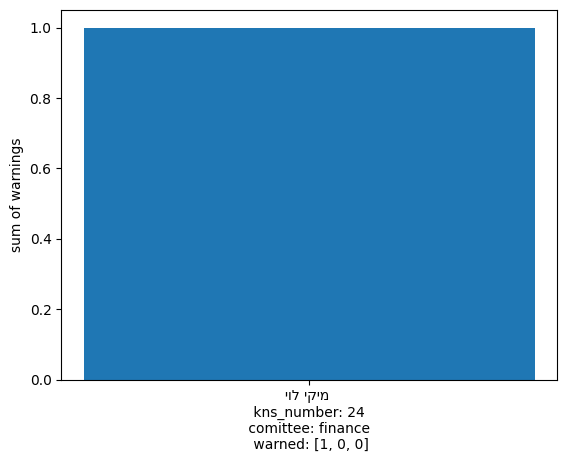

In [52]:
for member, w1w2w3, kns, cat in warned:
    plt.bar(f'{member[::-1]} \n kns_number: {kns} \n comittee: {cat} \n warned: {w1w2w3}', sum(w1w2w3))
plt.ylabel("sum of warnings")